<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3---Plots-with-Matplotlib" data-toc-modified-id="3---Plots-with-Matplotlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3 - Plots with Matplotlib</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.2.-Basic-Concepts-in-Matplotlib" data-toc-modified-id="3.2.-Basic-Concepts-in-Matplotlib-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>3.2. Basic Concepts in Matplotlib</a></span><ul class="toc-item"><li><span><a href="#3.2.1.-Two-graphics-interfaces" data-toc-modified-id="3.2.1.-Two-graphics-interfaces-1.0.1.1"><span class="toc-item-num">1.0.1.1&nbsp;&nbsp;</span>3.2.1. Two graphics interfaces</a></span></li></ul></li><li><span><a href="#3.3-Brands,-Colors-and-Sizes" data-toc-modified-id="3.3-Brands,-Colors-and-Sizes-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>3.3 Brands, Colors and Sizes</a></span><ul class="toc-item"><li><span><a href="#3.3.1.-Texts" data-toc-modified-id="3.3.1.-Texts-1.0.2.1"><span class="toc-item-num">1.0.2.1&nbsp;&nbsp;</span>3.3.1. Texts</a></span></li><li><span><a href="#3.3.2.-Seaborn-Bookstore" data-toc-modified-id="3.3.2.-Seaborn-Bookstore-1.0.2.2"><span class="toc-item-num">1.0.2.2&nbsp;&nbsp;</span>3.3.2. Seaborn Bookstore</a></span></li></ul></li></ul></li></ul></li></ul></div>

<img align="left" style="padding-right:10px;" width="150" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Star_Wars_Logo.svg/320px-Star_Wars_Logo.svg.png" />

*made by Ferran Carrascosa Mallafrè.*

< [Elementos básicos de Python](modulo1_tema4_Py_10_elem_bas.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | < [Colecciones de objetos: listas, tuplas y diccionarios](modulo1_tema4_Py_30_colec_obj.ipynb) >

__[Open in Colab](https://colab.research.google.com/github/griu/msc_python/blob/master/modulo1_tema4_Py_20_matplotlib.ipynb)__   *: <span style="color:rgba(255, 99, 71, 0.8)">Padawan! When you login to Colab, prepare the environment by running the following code.</span>*

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/msc_python.git /content/msc_python
    !git -C /content/msc_python pull
    %cd /content/msc_python

# 3 - Plots with Matplotlib

The graphics library [Matplotlib](https://matplotlib.org/), conceived by John Hunter in 2002, was built on numpy objects (N-dimensional arrays) and, later, adapted to Pandas objects (arrays with data vectors of different types).

Currently, it is supported by other simpler libraries and, with a graphic aspect, modernized with Seaborn and Pandas themselves.

We will deal with numpy and pandas objects extensively in the next section, however, since the course presupposes some knowledge of Python, we will now show the graphs to be able to use them in the following sections as a tool.

To import the library, the pyplot submodule is usually imported:

In [2]:
import matplotlib.pyplot as plt

##### 3.1. Guided Activity 2.2

It consists of knowing the species better through graphics. Specifically, you can analyze their height, years of life, species class (mammal, reptile, etc.) and how many movies that species has appeared in.

> «You can't take His Royal Highness there! The Hutts are gangsters..."
     ―Quarsh Panaka.

The first step is to load the species data and extract the variables.

In [3]:
import numpy as np
import pandas as pd

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
entidades_df['species']["num_peliculas"] = entidades_df['species'].films.apply(lambda x: len(x))   # numero de peliculas en las que aparece
species_df = entidades_df['species'][["classification","average_height","average_lifespan","num_peliculas"]].dropna()


nombre = species_df.index.values
clasificacion = species_df.classification.values
altura_media = species_df.average_height.values
vida_media = species_df.average_lifespan.values
num_peliculas = species_df.num_peliculas.values

species_df


,classification,average_height,average_lifespan,num_peliculas
name,,,,
Human,mammal,180.0,120.0,6
Wookie,mammal,210.0,400.0,4
Hutt,gastropod,300.0,1000.0,2
Yoda's species,mammal,66.0,900.0,5
Toydarian,mammal,120.0,91.0,2
Aleena,reptile,80.0,79.0,1
Nautolan,amphibian,180.0,70.0,1
Quermian,mammal,240.0,86.0,2
Kel Dor,unknown,180.0,70.0,2


*Notice* how each row represents a species that is characterized by 5 numpy vectors.

To learn more about numpy, go to the [Object Collections: numpy](modulo1_tema4_Py_31_numpy.ipynb) chapter:

- **nombre**: name of the species.
- **clasificacion**: classification of the species.
- **altura_media**: average height (in cm).
- **vida_media**: average-life in years.
- **num_peliculas**: number of movies in which that species appears.

### 3.2. Basic Concepts in Matplotlib

The style that regulates the general appearance of the graph is adjusted to seaborn-whitegrid:

In [4]:
plt.style.use('seaborn-whitegrid');

To define a plot, the pyplot library has many methods.

For example, to build a scatter plot, use the `plt.scatter()` function.

Let's see the dispersion between the average height of each species:

In [5]:
altura_media # vector x

array([180., 210., 300.,  66., 120.,  80., 180., 240., 180., 180., 178.,
       220., 190., 180., 170., 190.])

And the average lifetime of each species:

In [6]:
vida_media # vector y

array([ 120.,  400., 1000.,  900.,   91.,   79.,   70.,   86.,   70.,
         70.,   75.,   80.,  100.,   94.,   80.,  700.])

Both vector `x` and vector `y` are specified:

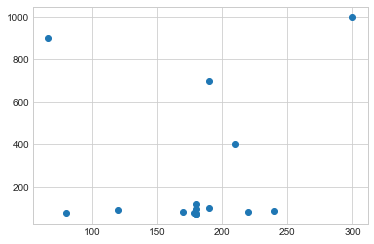

In [7]:
plt.scatter(x=altura_media,y=vida_media)
plt.show();

Note that matplotlib has added a set of elements such as axes with their marks or `ticks`. These elements are configured in the style.

Notice, too, that the `plt.show()` function has been called. This function sorts the graph output by screen. It is commonly used in python scripts with the `.py` extension.

On notebooks, it is customary to bypass the `plt.show()` call, setting its output to the screen automatically in each cell. To do this, include the magic command `%matplotlib inline`, at the start of the notebook:

In [8]:
%matplotlib inline

You can save the graph with:

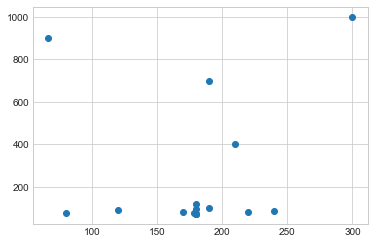

In [9]:
plt.scatter(x=altura_media,y=vida_media)
plt.savefig('www/especies.png');

> **Remember**: you can open a local .png file with the `Image()` function.

In [10]:
from IPython.display import Image
Image('www/especies.png');

#### 3.2.1. Two graphics interfaces

The definition of a graph can be done through two interfaces.

##### 3.2.1.1. The MATLAB style

Pytplot, initially, was designed in the image and likeness of the MATLAB graphics library.

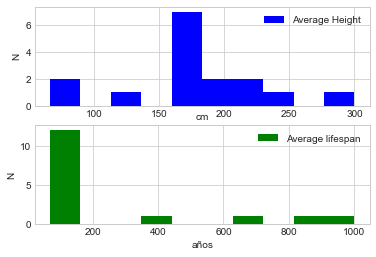

In [11]:
plt.figure();  # crea la figura del plot

# create the first panel and configure the axes.
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.hist(altura_media, color="blue", label="Average Height")
plt.xlabel("cm",labelpad=-6)  # labelpad scrolls the title up
plt.ylabel("N")
plt.legend();

# crea el segundo panel y lo configura lo ejes
plt.subplot(2, 1, 2)
plt.hist(vida_media, color="green", label="Average lifespan");
plt.xlabel("años")
plt.ylabel("N")
plt.legend();


Notice that `plt` is adding elements to the current graph. Once you go to the second panel, going back to the first panel becomes a complex job. For this the following interface was defined.

#####  3.2.1.2. object oriented interface

It is separated in figure and axes. This allows you to reference any chart on the dashboard.

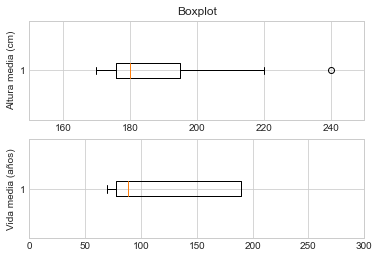

In [12]:
# The grid of plots is created
# ax will be a vector of 2 Axes objects
fig, ax = plt.subplots(2);


# Call the plot() method on the appropriate object
ax[0].boxplot(altura_media, vert=False);
ax[1].boxplot(vida_media, vert=False);

ax[0].set(xlim=(150, 250),
       ylabel='Altura media (cm)',
       title='Boxplot');
ax[1].set(xlim=(0, 300),
       ylabel='Vida media (años)');

### 3.3 Brands, Colors and Sizes

In Matplotlib you can customize these elements, however, it is somewhat tedious. The Seaborn package provides some facilities here, as we will see.

Let's look at an example of this:

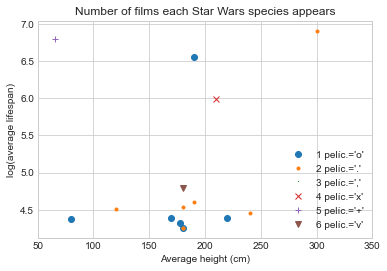

In [13]:
marcas = ['o', '.', ',', 'x', '+', 'v']
for i in range(6):
    plt.plot(altura_media[num_peliculas==i+1], np.log(vida_media[num_peliculas==i+1])
             , marcas[i]
             , label= str(i+1) + " pelíc.='{0}'".format(marcas[i]))
plt.legend(numpoints=1, loc="lower right")
plt.title("Number of films each Star Wars species appears")
plt.xlabel("Average height (cm)")
plt.ylabel("log(average lifespan)")
plt.xlim(50, 350);

Notice how, on each iteration, the plot is labeled with a `label`. In this way, elements are generated that will later be included in the legend. The color, in this case, changes in each iteration by default.

Now, let's see an example where the `viridis` color palette is modified and, also, the size of the points. We include a legend with the continuous color scale:

C:\Users\usuari\AppData\Local\Temp/ipykernel_2512/1913635115.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar();  # Show the palette


Text(0, 0.5, 'log(average lifespan)')

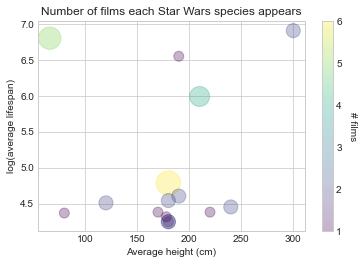

In [14]:
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis');

# color legend
cbar = plt.colorbar();  # Show the palette
cbar.ax.get_yaxis().labelpad = 15   # make space for the title
cbar.ax.set_ylabel('# films', rotation=270) # add title

plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Number of films each Star Wars species appears")
plt.xlabel("Average height (cm)")
plt.ylabel("log(average lifespan)")


Other interesting palettes are: `'jet'`, `'RdBu'` y `'cubehelix'`.

#### 3.3.1. Texts

To add text to charts, there are two methods:

The first is `plt.text()` and is geared towards simply adding text.

C:\Users\usuari\AppData\Local\Temp/ipykernel_2512/547397302.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar();  # Show the palette


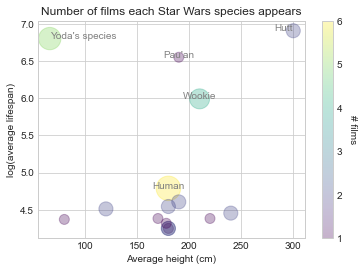

In [15]:
# Retrieve the species graph
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis')

# color legend
cbar = plt.colorbar();  # Show the palette
cbar.ax.get_yaxis().labelpad = 15   # make space for the title
cbar.ax.set_ylabel('# films', rotation=270) # add title

plt.title("Number of films each Star Wars species appears")
plt.xlabel("Average height (cm)")
plt.ylabel("log(average lifespan)")

# Add labels to the plot
style = dict(size=10, color='grey')


plt.text(300, np.log(1000), "Hutt", **style, ha='right')
plt.text(66, np.log(900), "Yoda's species", **style, ha='left')
plt.text(190, np.log(700), "Pau'an", **style, ha='center')
plt.text(210, np.log(400), "Wookie", **style, ha='center')
plt.text(180, np.log(120), "Human", **style, ha='center');


It is relevant to note that you have to add the texts one by one, or using a loop.

The following `.annotate()` method allows you to customize the location and arrows:

C:\Users\usuari\AppData\Local\Temp/ipykernel_2512/2935046977.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar();  # Show the palette


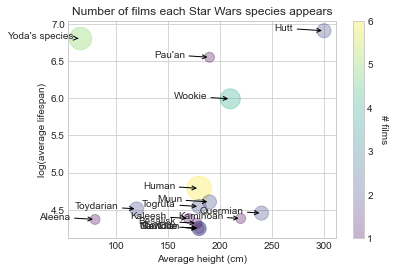

In [16]:
# Retrieve the species graph
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis')
            
# color legend
cbar = plt.colorbar();  # Show the palette
cbar.ax.get_yaxis().labelpad = 15   # make space for the title
cbar.ax.set_ylabel('# films', rotation=270) # add title

plt.title("Number of films each Star Wars species appears")
plt.xlabel("Average height (cm)")
plt.ylabel("log(average lifespan)")

# Add labels to the plot
style = dict(size=10, color='green')

for x1,y1,n1 in zip(altura_media, np.log(vida_media),nombre):
    plt.annotate(n1,(x1, y1)
             , arrowprops=dict(arrowstyle="->")
             , textcoords="offset points" # desplaza el punto
             , xytext=(-40,0)  # distancia desplazamiento
             , ha='center')   # centrado



It is not very aesthetic, but it can be useful in certain cases.

#### 3.3.2. Seaborn Bookstore

It automates the generation of graphs with data frames taking advantage of the assignment of names to their rows and columns.

We load the library and configure the default style:

In [17]:
import seaborn as sns
sns.set()

We see that the previous graph changes style:

C:\Users\usuari\AppData\Local\Temp/ipykernel_2512/1505598147.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar();  # Show the palette


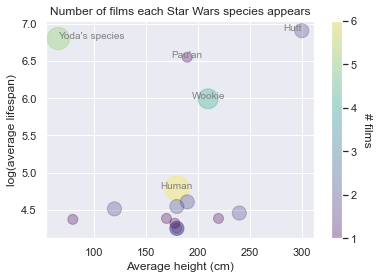

In [18]:
# Retrieve the species graph
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis')

# color legend
cbar = plt.colorbar();  # Show the palette
cbar.ax.get_yaxis().labelpad = 15   # make space for the title
cbar.ax.set_ylabel('# films', rotation=270) # add title

plt.title("Number of films each Star Wars species appears")
plt.xlabel("Average height (cm)")
plt.ylabel("log(average lifespan)")

# Add labels to the plot
style = dict(size=10, color="grey")


plt.text(300, np.log(1000), "Hutt", **style, ha='right')
plt.text(66, np.log(900), "Yoda's species", **style, ha='left')
plt.text(190, np.log(700), "Pau'an", **style, ha='center')
plt.text(210, np.log(400), "Wookie", **style, ha='center')
plt.text(180, np.log(120), "Human", **style, ha='center');


A first sample of Seaborn's possibilities, for exploratory analysis, is the 2 to 2 scatter plot:

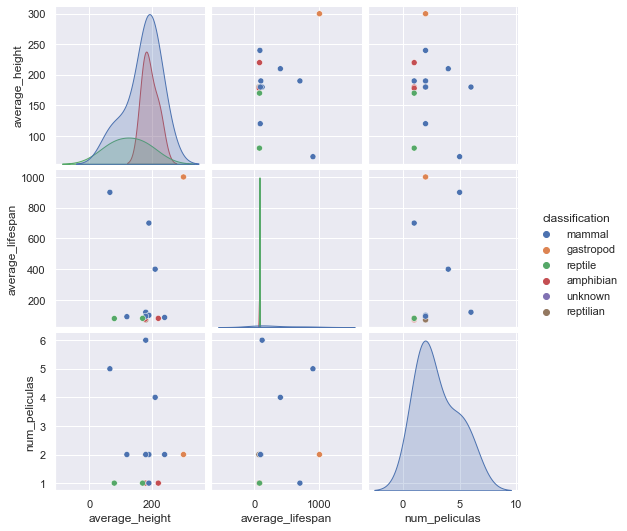

In [19]:
import warnings
warnings.filterwarnings('ignore')   # we filter warnings to avoid problems with species of an individual.

# Species of more than one individual
sns.pairplot(species_df, hue="classification", height=2.5);

Diagonally, a density graph (similar to a histogram) is displayed.

In the rest of the quadrant, the scatter plot between two variables is shown. Colors are also added with the species.

Impressive!

Now let's see how easy it is to parse boxplots:

C:\Users\usuari\Anaconda3\envs\mufib_env383\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


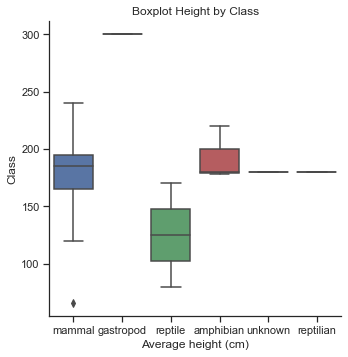

In [20]:
warnings.filterwarnings('default')   # we filter warnings to avoid problems with species of an individual.

with sns.axes_style(style='ticks'):
    g = sns.catplot("classification", "average_height", data=species_df, kind="box")

plt.gcf().subplots_adjust(top=0.95)
plt.title("Boxplot Height by Class")
plt.xlabel("Average height (cm)")
plt.ylabel("Class");

Finally, we see the scatter plot where the color and brand have been customized for each species. Also, the size has been customized according to the number of movies.

To make the graph more visual, we only show the species with less than 200 years of expected lifespan:

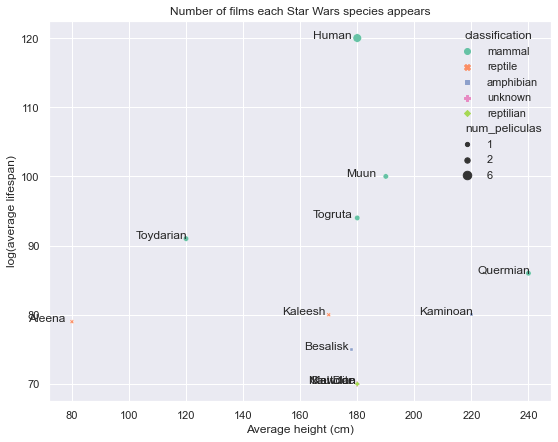

In [21]:
# Retrieve the species graph
sns.set(rc={'figure.figsize':(9,7)});
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True);

ax = sns.scatterplot(x='average_height', y='average_lifespan'
            , hue='classification', size="num_peliculas" 
            , style="classification", palette="Set2"
            , data=species_df[species_df.average_lifespan<200]);


plt.title("Number of films each Star Wars species appears")
plt.xlabel("Average height (cm)")
plt.ylabel("log(average lifespan)")

# Add labels to the plot
for x1,y1,n1 in zip(altura_media[species_df.average_lifespan<200]
                    ,vida_media[species_df.average_lifespan<200]
                    ,nombre[species_df.average_lifespan<200]):
    plt.annotate(n1,(x1, y1)
             , textcoords="offset points" # offsets the point
             , xytext=(-25,0)  # offset distance
             , ha='center')   # centered


Let's now dive deeper into the way Python handles collections of objects.

< [Elementos básicos de Python](modulo1_tema4_Py_10_elem_bas.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | < [Colecciones de objetos: listas, tuplas y diccionarios](modulo1_tema4_Py_30_colec_obj.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/msc_python/blob/master/modulo1_tema4_Py_20_matplotlib.ipynb)__